In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):

    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("../../../data/santander-customer-satisfaction/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../../data/santander-customer-satisfaction/test.csv", encoding='latin-1')
santander_submission_df = pd.read_csv("../../../data/santander-customer-satisfaction/sample_submission.csv", encoding='latin-1')

print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [47]:
from sklearn.model_selection import train_test_split

# var3 피처 값 대체(2가 많으니 2로 대체) 및 ID 피처 드롭 -> 고민이 필요함
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# predict_df에서의 ID 드롭
predict_df.drop('ID', axis=1, inplace=True)

cust_df['var3'].value_counts()

var3
2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: count, Length: 207, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X.shape))
print('피처 데이터 shape:{0}'.format(y.shape))

# 표준화 => 2차원 데이터
sc = StandardScaler()
X = sc.fit_transform(X)
print('피처 데이터 shape:{0}'.format(X.shape))


predict_df = sc.transform(predict_df)
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(76020, 369)
피처 데이터 shape:(76020,)
피처 데이터 shape:(76020, 369)
피처 데이터 shape:(75818, 369)


# ------------------------------------------------------------------------------

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print('학습 세트 Shape:{0}, 검증 세트 Shape:{1}'.format(X_tr.shape , X_val.shape))

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369) 

학습 세트 레이블 값 분포 비율
TARGET
0    96.096422
1     3.903578
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    95.830045
1     4.169955
Name: count, dtype: float64 

학습 세트 Shape:(42571, 369), 검증 세트 Shape:(18245, 369)


## SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_1, y_1 = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(116819, 369), 테스트 세트 Shape:(29205, 369) 

학습 세트 레이블 값 분포 비율
TARGET
0    50.143384
1    49.856616
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.573532
0    49.426468
Name: count, dtype: float64 



In [7]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('train set - 랜덤 포레스트 정확도: {0:.4f}'.format(rf_clf.score(X_train, y_train)))
print('test set - 랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ws_preds = rf_clf.predict(X_test)
ws_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

train set - 랜덤 포레스트 정확도: 0.7885
test set - 랜덤 포레스트 정확도: 0.7880
오차 행렬
[[10811  3624]
 [ 2568 12202]]
정확도: 0.7880, 정밀도: 0.7710, 재현율: 0.8261,    F1: 0.7976, AUC:0.8742


In [8]:
predict_santander_pred_rf = rf_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_rf[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_rf
santander_submission_df.to_csv('santander_submission_rf_SMOTE_sc_1.csv',index=False)
santander_submission_df

predict_santander 예측: [0 0 0 1 0 1 0 1 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,1
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


## ADASYN

In [23]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_2, y_2 = adasyn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(117196, 369), 테스트 세트 Shape:(29300, 369) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.016212
0    49.983788
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.740614
0    49.259386
Name: count, dtype: float64 



In [16]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)

# rf_clf.fit(X_train , y_train)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('train set - 랜덤 포레스트 정확도: {0:.4f}'.format(rf_clf.score(X_train, y_train)))
print('test set - 랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ws_preds = rf_clf.predict(X_test)
ws_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

train set - 랜덤 포레스트 정확도: 0.7929
test set - 랜덤 포레스트 정확도: 0.7957
오차 행렬
[[10596  3422]
 [ 2441 12246]]
정확도: 0.7957, 정밀도: 0.7816, 재현율: 0.8338,    F1: 0.8069, AUC:0.8834


In [11]:
predict_santander_pred_rf = rf_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_rf[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_rf
santander_submission_df.to_csv('santander_submission_rf_ADASYN_sc_1.csv',index=False)
santander_submission_df

predict_santander 예측: [0 0 0 1 0 1 0 1 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,1
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


## SMOTETOMEK

In [49]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_3, y_3 = smoteto.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(114814, 369), 테스트 세트 Shape:(28704, 369) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.712457
0    49.287543
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    51.515468
0    48.484532
Name: count, dtype: float64 



In [17]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('train set - 랜덤 포레스트 정확도: {0:.4f}'.format(rf_clf.score(X_train, y_train)))
print('test set - 랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ws_preds = rf_clf.predict(X_test)
ws_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

train set - 랜덤 포레스트 정확도: 0.7948
test set - 랜덤 포레스트 정확도: 0.7976
오차 행렬
[[10626  3392]
 [ 2418 12269]]
정확도: 0.7976, 정밀도: 0.7834, 재현율: 0.8354,    F1: 0.8086, AUC:0.8843


In [18]:
predict_santander_pred_rf = rf_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_rf[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_rf
santander_submission_df.to_csv('santander_submission_rf_SMOTETOMEK_sc_1.csv',index=False)
santander_submission_df

predict_santander 예측: [0 0 0 1 0 1 0 1 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,1
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'max_depth': [2, 3, 4, 8, 10],
    'min_samples_leaf' : [6, 12, 24],
    'min_samples_split' : [8, 16, 24]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, criterion='gini')
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=StratifiedKFold(), n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

ws_preds = grid_cv.predict(X_test )
ws_pred_proba = grid_cv.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)
#819초

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 24}
최고 예측 정확도: 0.8159
오차 행렬
[[11159  3274]
 [ 2049 12818]]
정확도: 0.8183, 정밀도: 0.7965, 재현율: 0.8622,    F1: 0.8281, AUC:0.8952


In [27]:
best_rf = grid_cv.best_estimator_
best_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=24,
                       n_jobs=-1, oob_score=True)

In [26]:
predict_santander_pred_rf_hyper = best_rf.predict(predict_df)

santander_submission_df['TARGET'] = predict_santander_pred_rf_hyper
santander_submission_df.to_csv('santander_submission_rf_hyper_final.csv',index=False)
santander_submission_df

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'max_depth': [3],
    'min_samples_leaf' : [200],
    'min_samples_split' : [200]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, criterion='gini')
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=StratifiedKFold())
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

ws_preds = grid_cv.predict(X_test )
ws_pred_proba = grid_cv.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

최적 하이퍼 파라미터:
 {'max_depth': 3, 'min_samples_leaf': 200, 'min_samples_split': 200}
최고 예측 정확도: 0.7126
오차 행렬
[[10313  3596]
 [ 4757 10042]]
정확도: 0.7090, 정밀도: 0.7363, 재현율: 0.6786,    F1: 0.7063, AUC:0.8172


In [160]:
predict_santander_pred_rf_hyper = best_rf.predict(predict_df)

santander_submission_df['TARGET'] = predict_santander_pred_rf_hyper
santander_submission_df.to_csv('santander_submission_rf_hyper_1.csv',index=False)
santander_submission_df

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


## 앙상블

In [136]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 개별 모델은 로지스틱 회귀와 KNN, DT, RF
# lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('KNN',knn_clf), ('DT', dt), ('RF', rf)], voting='soft')

# VotingClassifier 학습/예측/평가. 
# vo_clf.fit(X_train , y_train)
vo_clf.fit(X_train, y_train)

vo_pred = vo_clf.predict(X_test)
vo_pred_proba = vo_clf.predict_proba(X_test)[:, 1]
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , vo_pred)))
print(f"train score: {vo_clf.score(X_train, y_train)}")
get_clf_eval(y_test , vo_pred, vo_pred_proba)
print("\n")

# 개별 모델의 학습/예측/평가.
classifiers = [knn_clf, dt, rf]
for classifier in classifiers:

    # classifier.fit(X_train , y_train)
    classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)
    pred_proba = classifier.predict_proba(X_test)[:, 1]
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))
    print(f"train score: {classifier.score(X_train, y_train)}")
    get_clf_eval(y_test ,pred, pred_proba)
    print("\n")

Voting 분류기 정확도: 0.9443
train score: 0.9887049438730634
오차 행렬
[[12935   974]
 [  626 14173]]
정확도: 0.9443, 정밀도: 0.9357, 재현율: 0.9577,    F1: 0.9466, AUC:0.9818


KNeighborsClassifier 정확도: 0.8871
train score: 0.907505943620514
오차 행렬
[[11518  2391]
 [  849 13950]]
정확도: 0.8871, 정밀도: 0.8537, 재현율: 0.9426,    F1: 0.8960, AUC:0.9529


DecisionTreeClassifier 정확도: 0.9249
train score: 0.9887049438730634
오차 행렬
[[12727  1182]
 [  975 13824]]
정확도: 0.9249, 정밀도: 0.9212, 재현율: 0.9341,    F1: 0.9276, AUC:0.9329


RandomForestClassifier 정확도: 0.9497
train score: 0.9887049438730634
오차 행렬
[[13132   777]
 [  668 14131]]
정확도: 0.9497, 정밀도: 0.9479, 재현율: 0.9549,    F1: 0.9514, AUC:0.9813




In [135]:
predict_santander_pred_vo_clf = vo_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_vo_clf[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_vo_clf
santander_submission_df.to_csv('santander_submission_voting_SMOTETOMEK.csv',index=False)
santander_submission_df

predict_santander 예측: [0 0 0 0 0 0 0 0 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0


## 서포트 백터

In [28]:
from sklearn.svm import SVC

svm = SVC(probability=True)
sv = svm.fit(X_train, y_train)

ws_preds = sv.predict(X_test)
ws_pred_proba = sv.predict_proba(X_test)[:,1]

In [29]:
print(f"test score: {sv.score(X_test, y_test)}")
print(f"train score: {sv.score(X_train, y_train)}")
get_clf_eval(y_test , ws_preds, ws_pred_proba)

test score: 0.763617747440273
train score: 0.7662804191269327
오차 행렬
[[10000  4433]
 [ 2493 12374]]
정확도: 0.7636, 정밀도: 0.7362, 재현율: 0.8323,    F1: 0.7813, AUC:0.8486


In [30]:
predict_santander_pred_svc = sv.predict(predict_df)

santander_submission_df['TARGET'] = predict_santander_pred_svc
santander_submission_df.to_csv('santander_submission_svc.csv',index=False)
santander_submission_df

,ID,TARGET
0,2,0
1,5,1
2,6,0
3,7,1
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_search.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_search.best_score_))

ws_preds = grid_search.predict(X_test )
ws_pred_proba = grid_search.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("../../../data/santander-customer-satisfaction/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../../data/santander-customer-satisfaction/test.csv", encoding='latin-1')
santander_submission_df = pd.read_csv("../../../data/santander-customer-satisfaction/sample_submission.csv", encoding='latin-1')

# var3 피처 값 대체(2가 많으니 2로 대체) 및 ID 피처 드롭 -> 고민이 필요함
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# predict_df에서의 ID 드롭
predict_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X.shape))
print('피처 데이터 shape:{0}'.format(y.shape))

# 표준화 => 2차원 데이터
sc = StandardScaler()
X = sc.fit_transform(X)
print('피처 데이터 shape:{0}'.format(X.shape))

predict_df = sc.transform(predict_df)
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(76020, 369)
피처 데이터 shape:(76020,)
피처 데이터 shape:(76020, 369)
피처 데이터 shape:(75818, 369)


In [2]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_3, y_3 = smoteto.fit_resample(X, y)

## PCA

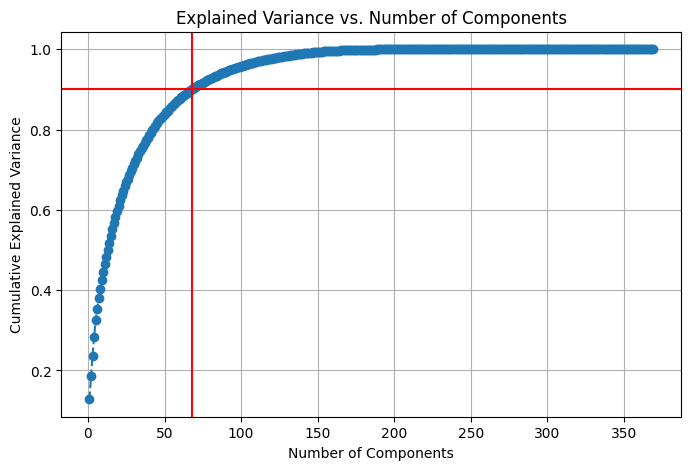

Optimal number of components for 90% variance: 68


In [4]:
from sklearn.decomposition import PCA

# PCA를 실행하여 설명된 분산 비율을 구하기
pca = PCA()
pca1 = pca.fit(X_3)
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산 비율을 구하기
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 누적 설명된 분산 비율이 90% 이상이 되는 지점을 찾기
threshold = 0.90
optimal_n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# 설명된 분산 비율을 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

print(f"Optimal number of components for 90% variance: {optimal_n_components}")

# 설명된 분산 비율이 90% 또는 95% 이상을 차지하는 지점에서의 n_components 값을 선택할 수 있다.
# 일반적으로 누적 설명된 분산 비율이 90% 이상이 되는 지점을 선택하는 것이 좋다.
# 설명된 분산 비율이 급격히 증가하다가 점차 완만해지는 "엘보(elbow)" 지점을 찾는 것이 중요

In [5]:
pca = PCA(n_components=68)
pca_test = pca.fit_transform(X_3)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_test, y_3, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(114837, 68), 테스트 세트 Shape:(28710, 68) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.771093
0    49.228907
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    51.229537
0    48.770463
Name: count, dtype: float64 



In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('train set - 랜덤 포레스트 정확도: {0:.4f}'.format(rf_clf.score(X_train, y_train)))
print('test set - 랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ws_preds = rf_clf.predict(X_test)
ws_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

train set - 랜덤 포레스트 정확도: 0.8240
test set - 랜덤 포레스트 정확도: 0.8137
오차 행렬
[[11273  2729]
 [ 2619 12089]]
정확도: 0.8137, 정밀도: 0.8158, 재현율: 0.8219,    F1: 0.8189, AUC:0.8814


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'max_depth': [2, 3, 4, 8, 10],
    'min_samples_leaf' : [6, 12, 24],
    'min_samples_split' : [8, 16, 24]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, criterion='gini')
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=StratifiedKFold(), n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

ws_preds = grid_cv.predict(X_test )
ws_pred_proba = grid_cv.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)
#819초

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 8}
최고 예측 정확도: 0.8471
오차 행렬
[[11451  2551]
 [ 1793 12915]]
정확도: 0.8487, 정밀도: 0.8351, 재현율: 0.8781,    F1: 0.8560, AUC:0.9076
